<a href="https://colab.research.google.com/github/Rafia-Shaikh-eng/A-Filter-based-Feature-Selection-Approach-in-Multilabel-Classification/blob/main/Chi2_Feature_selection_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# if the scikit-multilearn not installed run this cell
!pip install scikit-multilearn
# most of the datasets in Weka Arff format for this installed this library
!pip install arff

     |████████████████████████████████| 92kB 4.0MB/s 
  Created wheel for arff: filename=arff-0.9-cp36-none-any.whl size=4969 sha256=782a31c2514bcaa0d565b0de068e23cff72daf620ad1d8f5e4e9986277cd8dc9
  Stored in directory: /root/.cache/pip/wheels/04/d0/70/2c73afedd3ac25c6085b528742c69b9587cbdfa67e5194583b
Successfully built arff


In [ ]:
#03 classifiers hamming loss list
hamming_loss_MLTSVM=[]
hamming_loss_MLKNN=[]
hamming_loss_BRKNNa=[]
#03 classifier accuracy list
accuracy_MLTSVM=[]
accuracy_MLKNN=[]
accuracy_BRKNNa=[]
#03 classifier precision list
precision_MLTSVM=[]
precision_MLKNN=[]
precision_BRKNNa=[]
#03 classifier recall list
recall_MLTSVM=[]
recall_MLKNN=[]
recall_BRKNNa=[]
#03 classifier f1 measure list
f1_measure_MLTSVM=[]
f1_measure_MLKNN=[]
f1_measure_BRKNNa=[]

# Feature selection

### 01- Medical dataset

In [ ]:
#Load Medical Dataset
from skmultilearn.dataset import load_dataset
x1,y1, _, _ = load_dataset('medical', 'undivided')
print("Actual Dataset")
print(x1.shape,y1.shape)
#change to matrix
x1=x1.todense()
y1=y1.todense()
import pandas as pd
#change to dataFrame
x1=pd.DataFrame(x1)
y1=pd.DataFrame(y1)
print("Coverted into Dataframe")
print(x1.shape,y1.shape)

medical:undivided - does not exists downloading
Downloaded medical-undivided
Actual Dataset
(978, 1449) (978, 45)
Coverted into Dataframe
(978, 1449) (978, 45)


### II-Chi2

In [ ]:
# import the required functions and object.
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd

# select the number of features you want to retain.
select_k1 = round(len(x1.columns)*0.2)
print("20% features of medical dataset = ",select_k1)

features_selected_20=[]
features_weights=[]
for a in range(len(x1.columns)):
   features_weights.append(0)
for i in range(len(y1.columns)):
  # apply the chi2 score on the data and target (target should be binary).
  selection = SelectKBest(chi2, k=select_k1).fit(x1, y1.iloc[:,i])

  # display the retained features.
  features=list(x1.columns[selection.get_support()])
  labels=y1.columns[i]
  features_selected_20.append([labels, features])
  #print(features_selected_20[i])

  #calculating weight for each feature
  #if a feature is correlate to label count them and than divide it by total labels
  for f in features:
    for count in range(len(x1.columns)):
      if(f==x1.columns[count]):
        features_weights[count]+=1
list_f_w={}
#if a feature is correlate to label count them and than divide it by total labels
for i in range(len(x1.columns)):
  features_weights[i]=round(features_weights[i]/len(x1.columns),3)
  list_f_w.update({x1.columns[i] : features_weights[i]})

20% features of medical dataset =  290


In [ ]:
#sort weights
import operator
sorted_list_f_w = sorted(list_f_w.items(), key=operator.itemgetter(1), reverse=True)
import collections
sorted_dict_f = collections.OrderedDict(sorted_list_f_w)
#print(sorted_dict_f)

In [ ]:
#now, access top 50% weighted features(keys)
final_features=[]
found=False
for i in range(round(len(x1.columns)*0.5)):
    final_features.append(list(sorted_dict_f.keys())[i])
final_features.sort()

#drop other than top 50% weighted features
selected_features = set(x1.columns).intersection(final_features)

#print(set(x.columns))
print(selected_features)

for i in list(x1.columns):
    if i not in selected_features:
        x1 = x1.drop(columns=[i])

#print(set(x.columns) == selected_features)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 66, 67, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 89, 91, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 24

In [ ]:
x1

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,41,...,1349,1352,1353,1356,1358,1364,1366,1369,1371,1373,1374,1376,1379,1385,1386,1388,1389,1391,1393,1394,1395,1400,1401,1403,1404,1408,1414,1416,1418,1419,1420,1431,1432,1436,1438,1439,1441,1442,1443,1444
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
974,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
975,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(x1.columns)
print(final_features)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1420, 1431, 1432, 1436, 1438, 1439, 1441, 1442, 1443, 1444],
           dtype='int64', length=724)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 66, 67, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 89, 91, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201

In [ ]:
from scipy import sparse as s
x1 = s.csr_matrix(x1)
y1 = s.csr_matrix(y1)

### Train , test split

In [ ]:
from skmultilearn.model_selection import iterative_train_test_split
x1_train, y1_train, x1_test, y1_test = iterative_train_test_split(x1, y1, test_size = 0.3)
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(685, 724) (293, 724) (685, 45) (293, 45)


In [ ]:
print(x1_train.shape,x1_test.shape,y1_train.shape, y1_test.shape)

(685, 724) (293, 724) (685, 45) (293, 45)


# MLC

In [ ]:
#MLTSVM
from skmultilearn.adapt import MLTSVM
classifier1 = MLTSVM(max_iteration=1000,c_k=2**-6)
# train
classifier1.fit(x1_train, y1_train)
# predict
MLTSVM1_predictions = classifier1.predict(x1_test)

In [ ]:
#MLKNN
from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.
# apply MLkNN for medical dataset it has 45 labels.
classifier2 = MLkNN(k=45)
# train
classifier2.fit(x1_train, y1_train)
# predict
MLKNN1_predictions = classifier2.predict(x1_test)

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier3 = BRkNNaClassifier(k=45)
# train
classifier3.fit(x1_train, y1_train)
# predict
BR1_predictions = classifier3.predict(x1_test)

### 01-Results

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y1_test, MLTSVM1_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y1_test, MLKNN1_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y1_test, BR1_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y1_test, MLTSVM1_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y1_test, MLKNN1_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y1_test, BR1_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y1_test, MLTSVM1_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y1_test, MLKNN1_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y1_test, BR1_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y1_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y1_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y1_test, BR1_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y1_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y1_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y1_test, BR1_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels)")
print("------------------------------")
print("MLTSVM -> ",MLTSVM1_predictions.shape)
print("MLKNN  -> ",MLKNN1_predictions.shape)
print("BRKNNa -> ",BR1_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y1_test, MLTSVM1_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y1_test, MLKNN1_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y1_test, BR1_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y1_test, MLTSVM1_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y1_test, MLKNN1_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y1_test, BR1_predictions),2))
print("------------------------------")
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y1_test, MLTSVM1_predictions, average='micro', zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y1_test, MLKNN1_predictions, average='micro', zero_division='warn'),2))
print("BRKNNa -> ",round(m.precision_score(y1_test, BR1_predictions, average='micro', zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y1_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.recall_score(y1_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.recall_score(y1_test, BR1_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y1_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.f1_score(y1_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.f1_score(y1_test, BR1_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels)
------------------------------
MLTSVM ->  (293, 45)
MLKNN  ->  (293, 45)
BRKNNa ->  (293, 45)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.02
MLKNN  ->  0.02
BRKNNa ->  0.02
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.47
MLKNN  ->  0.41
BRKNNa ->  0.27
------------------------------
	Precision
------------------------------
MLTSVM ->  0.75
MLKNN ->  0.86
BRKNNa ->  0.83
------------------------------
	Recall
------------------------------
MLTSVM ->  0.66
MLTSVM ->  0.47
MLTSVM ->  0.31
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.7
MLTSVM ->  0.61
MLTSVM ->  0.46



### 02- Enron dataset

In [ ]:
from skmultilearn.dataset import load_dataset
x2,y2, _, _ = load_dataset('enron', 'undivided')
print("Actual Dataset")
print(x2.shape,y2.shape)
#change to matrix
x2=x2.todense()
y2=y2.todense()
import pandas as pd
#change to dataFrame
x2=pd.DataFrame(x2)
y2=pd.DataFrame(y2)
print("Coverted into Dataframe")
print(x2.shape,y2.shape)

enron:undivided - does not exists downloading
Downloaded enron-undivided
Actual Dataset
(1702, 1001) (1702, 53)
Coverted into Dataframe
(1702, 1001) (1702, 53)


### II-Chi2

In [ ]:
# import the required functions and object.
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd

# select the number of features you want to retain.
select_k1 = round(len(x2.columns)*0.2)
print("20% features of medical dataset = ",select_k1)

features_selected_20=[]
features_weights=[]
for a in range(len(x2.columns)):
   features_weights.append(0)
for i in range(len(y2.columns)):
  # apply the chi2 score on the data and target (target should be binary).
  selection = SelectKBest(chi2, k=select_k1).fit(x2, y2.iloc[:,i])

  # display the retained features.
  features=list(x2.columns[selection.get_support()])
  labels=y2.columns[i]
  features_selected_20.append([labels, features])
  #print(features_selected_20[i])

  #calculating weight for each feature
  #if a feature is correlate to label count them and than divide it by total labels
  for f in features:
    for count in range(len(x2.columns)):
      if(f==x2.columns[count]):
        features_weights[count]+=1
list_f_w={}
#if a feature is correlate to label count them and than divide it by total labels
for i in range(len(x2.columns)):
  features_weights[i]=round(features_weights[i]/len(x2.columns),3)
  list_f_w.update({x2.columns[i] : features_weights[i]})

20% features of medical dataset =  200


In [ ]:
#sort weights
import operator
sorted_list_f_w = sorted(list_f_w.items(), key=operator.itemgetter(1), reverse=True)
import collections
sorted_dict_f = collections.OrderedDict(sorted_list_f_w)
#print(sorted_dict_f)

In [ ]:
#now, access top 50% weighted features(keys)
final_features=[]
found=False
for i in range(round(len(x2.columns)*0.5)):
    final_features.append(list(sorted_dict_f.keys())[i])
final_features.sort()

#drop other than top 50% weighted features
selected_features = set(x2.columns).intersection(final_features)

#print(set(x.columns))
print(selected_features)

for i in list(x2.columns):
    if i not in selected_features:
        x2 = x2.drop(columns=[i])

#print(set(x.columns) == selected_features)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14, 17, 19, 21, 22, 23, 25, 26, 28, 29, 59, 60, 62, 63, 64, 68, 69, 72, 75, 76, 78, 79, 83, 84, 88, 90, 91, 93, 94, 96, 98, 101, 102, 105, 106, 109, 110, 111, 117, 118, 119, 122, 123, 126, 129, 130, 133, 135, 136, 140, 141, 143, 144, 146, 150, 151, 155, 161, 162, 163, 164, 165, 166, 170, 172, 178, 180, 181, 183, 184, 185, 186, 187, 188, 192, 193, 194, 195, 196, 199, 200, 202, 203, 204, 205, 206, 210, 212, 214, 215, 217, 220, 221, 222, 223, 226, 228, 230, 231, 233, 235, 236, 238, 239, 242, 243, 244, 246, 249, 251, 252, 253, 255, 256, 258, 259, 260, 262, 263, 266, 267, 271, 273, 276, 278, 280, 282, 284, 285, 287, 288, 289, 290, 291, 295, 296, 297, 298, 300, 301, 302, 303, 307, 308, 309, 313, 314, 320, 322, 323, 325, 328, 329, 332, 335, 336, 337, 338, 339, 341, 342, 344, 345, 347, 349, 350, 351, 353, 356, 357, 358, 360, 361, 364, 368, 369, 370, 372, 373, 374, 375, 376, 378, 385, 388, 389, 390, 395, 403, 404, 405, 406, 408, 409, 410, 412, 414, 418, 420, 421,

In [ ]:
x2

,1,2,3,4,5,6,7,8,9,11,14,17,19,21,22,23,25,26,28,29,59,60,62,63,64,68,69,72,75,76,78,79,83,84,88,90,91,93,94,96,...,918,920,926,929,931,933,935,937,938,939,940,943,944,946,947,948,949,951,956,959,960,964,970,971,977,978,979,980,982,983,985,988,990,992,993,996,997,998,999,1000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1698,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1700,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
print(x2.columns)
print(final_features)

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   11,
            ...
             985,  988,  990,  992,  993,  996,  997,  998,  999, 1000],
           dtype='int64', length=500)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14, 17, 19, 21, 22, 23, 25, 26, 28, 29, 59, 60, 62, 63, 64, 68, 69, 72, 75, 76, 78, 79, 83, 84, 88, 90, 91, 93, 94, 96, 98, 101, 102, 105, 106, 109, 110, 111, 117, 118, 119, 122, 123, 126, 129, 130, 133, 135, 136, 140, 141, 143, 144, 146, 150, 151, 155, 161, 162, 163, 164, 165, 166, 170, 172, 178, 180, 181, 183, 184, 185, 186, 187, 188, 192, 193, 194, 195, 196, 199, 200, 202, 203, 204, 205, 206, 210, 212, 214, 215, 217, 220, 221, 222, 223, 226, 228, 230, 231, 233, 235, 236, 238, 239, 242, 243, 244, 246, 249, 251, 252, 253, 255, 256, 258, 259, 260, 262, 263, 266, 267, 271, 273, 276, 278, 280, 282, 284, 285, 287, 288, 289, 290, 291, 295, 296, 297, 298, 300, 301, 302, 303, 307, 308, 309, 313, 314, 320, 322, 323, 325, 328, 329, 332, 335, 336, 337, 338, 339, 341, 

In [ ]:
from scipy import sparse as s
x2 = s.csr_matrix(x2)
y2 = s.csr_matrix(y2)

In [ ]:
from skmultilearn.model_selection import iterative_train_test_split
x2_train, y2_train, x2_test, y2_test = iterative_train_test_split(x2, y2, test_size = 0.3)
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(1193, 500) (509, 500) (1193, 53) (509, 53)


#MLC

In [ ]:
#from skmultilearn.adapt import MLTSVM
classifier1 = MLTSVM(c_k =2**-6)
# train
classifier1.fit(x2_train, y2_train)
# predict
MLTSVM2_predictions = classifier1.predict(x2_test)

In [ ]:
from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.
# apply MLkNN for enron dataset it has 53 labels.
classifier2 = MLkNN(k=53)

# train
classifier2.fit(x2_train, y2_train)

# predict
MLKNN2_predictions = classifier2.predict(x2_test)

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier3 = BRkNNaClassifier(k=53)
# train
classifier3.fit(x2_train, y2_train)
# predict
BR2_predictions = classifier3.predict(x2_test)

### 02- Results

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y2_test, MLTSVM2_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y2_test, MLKNN2_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y2_test, BR2_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y2_test, MLTSVM2_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y2_test, MLKNN2_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y2_test, BR2_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y2_test, MLTSVM2_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y2_test, MLKNN2_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y2_test, BR2_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y2_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y2_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y2_test, BR2_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y2_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y2_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y2_test, BR2_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels)")
print("------------------------------")
print("MLTSVM -> ",MLTSVM2_predictions.shape)
print("MLKNN  -> ",MLKNN2_predictions.shape)
print("BRKNNa -> ",BR2_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y2_test, MLTSVM2_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y2_test, MLKNN2_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y2_test, BR2_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y2_test, MLTSVM2_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y2_test, MLKNN2_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y2_test, BR2_predictions),2))
print("------------------------------")
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y2_test, MLTSVM2_predictions, average='micro', zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y2_test, MLKNN2_predictions, average='micro', zero_division='warn'),2))
print("BRKNNa -> ",round(m.precision_score(y2_test, BR2_predictions, average='micro', zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y2_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.recall_score(y2_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.recall_score(y2_test, BR2_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y2_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.f1_score(y2_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.f1_score(y2_test, BR2_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels)
------------------------------
MLTSVM ->  (509, 53)
MLKNN  ->  (509, 53)
BRKNNa ->  (509, 53)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.07
MLKNN  ->  0.05
BRKNNa ->  0.06
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.04
MLKNN  ->  0.06
BRKNNa ->  0.07
------------------------------
	Precision
------------------------------
MLTSVM ->  0.49
MLKNN ->  0.65
BRKNNa ->  0.55
------------------------------
	Recall
------------------------------
MLTSVM ->  0.36
MLTSVM ->  0.34
MLTSVM ->  0.13
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.41
MLTSVM ->  0.44
MLTSVM ->  0.21



## 03- Scene dataset

In [ ]:
#from skmultilearn.dataset import load_dataset
x3,y3, _, _ = load_dataset('scene', 'undivided')
print("Actual Dataset")
print(x3.shape,y3.shape)
#change to matrix
x3=x3.todense()
y3=y3.todense()
import pandas as pd
#change to dataFrame
x3=pd.DataFrame(x3)
y3=pd.DataFrame(y3)
print("Coverted into Dataframe")
print(x3.shape,y3.shape)

scene:undivided - does not exists downloading
Downloaded scene-undivided
Actual Dataset
(2407, 294) (2407, 6)
Coverted into Dataframe
(2407, 294) (2407, 6)


## II-Chi2

In [ ]:
# import the required functions and object.
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd

# select the number of features you want to retain.
select_k1 = round(len(x3.columns)*0.2)
print("20% features of medical dataset = ",select_k1)

features_selected_20=[]
features_weights=[]
for a in range(len(x3.columns)):
   features_weights.append(0)
for i in range(len(y3.columns)):
  # apply the chi2 score on the data and target (target should be binary).
  selection = SelectKBest(chi2, k=select_k1).fit(x3, y3.iloc[:,i])

  # display the retained features.
  features=list(x3.columns[selection.get_support()])
  labels=y3.columns[i]
  features_selected_20.append([labels, features])
  #print(features_selected_20[i])

  #calculating weight for each feature
  #if a feature is correlate to label count them and than divide it by total labels
  for f in features:
    for count in range(len(x3.columns)):
      if(f==x3.columns[count]):
        features_weights[count]+=1
list_f_w={}
#if a feature is correlate to label count them and than divide it by total labels
for i in range(len(x3.columns)):
  features_weights[i]=round(features_weights[i]/len(x3.columns),3)
  list_f_w.update({x3.columns[i] : features_weights[i]})

20% features of medical dataset =  59


In [ ]:
#sort weights
import operator
sorted_list_f_w = sorted(list_f_w.items(), key=operator.itemgetter(1), reverse=True)
import collections
sorted_dict_f = collections.OrderedDict(sorted_list_f_w)
#print(sorted_dict_f)

In [ ]:
#now, access top 50% weighted features(keys)
final_features=[]
found=False
for i in range(round(len(x3.columns)*0.5)):
    final_features.append(list(sorted_dict_f.keys())[i])
final_features.sort()

#drop other than top 50% weighted features
selected_features = set(x3.columns).intersection(final_features)

#print(set(x.columns))
print(selected_features)

for i in list(x3.columns):
    if i not in selected_features:
        x3 = x3.drop(columns=[i])

#print(set(x.columns) == selected_features)

{28, 29, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 55, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 165, 170, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 230, 231, 238, 239, 240, 243, 244, 246, 247, 248}


In [ ]:
x3

,28,29,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,53,55,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,...,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,230,231,238,239,240,243,244,246,247,248
0,0.546262,0.566969,0.574777,0.710196,0.614510,0.590450,0.508313,0.645884,0.800611,0.741071,0.607308,0.589019,0.659741,0.692727,0.796168,0.831285,0.842202,0.000188,0.000205,0.000122,0.196997,0.501902,0.127081,0.118791,0.222160,0.236605,0.181267,0.460236,0.081963,0.427434,0.427158,0.705878,0.460660,0.104982,0.238395,0.400990,0.500703,0.326300,0.542055,0.194235,...,0.236838,0.255211,0.264951,0.295480,0.346920,0.479871,0.126163,0.157363,0.194579,0.372685,0.529399,0.501197,0.495247,0.175233,0.206835,0.229838,0.364846,0.391528,0.380569,0.358092,0.178129,0.277878,0.307893,0.329844,0.438987,0.512927,0.569903,0.453827,0.499351,0.519089,0.530216,0.331432,0.578883,0.460268,0.589159,0.588030,0.602612,0.000611,0.001762,0.001927
1,0.636677,0.653249,0.692224,0.634007,0.605896,0.594992,0.650470,0.582844,0.620887,0.619105,0.635261,0.678480,0.656581,0.745513,0.733633,0.776127,0.702769,0.000000,0.000000,0.016047,0.005941,0.015581,0.297579,0.408266,0.407936,0.366136,0.514324,0.226144,0.278829,0.380476,0.392941,0.298399,0.449538,0.447431,0.388497,0.384122,0.308661,0.255651,0.218179,0.220413,...,0.349090,0.340613,0.342615,0.338120,0.351561,0.330146,0.389045,0.381464,0.382504,0.434112,0.522656,0.549864,0.520889,0.437265,0.404511,0.515007,0.472178,0.526537,0.530160,0.517445,0.409800,0.520744,0.501689,0.507928,0.559458,0.573269,0.550244,0.493950,0.587281,0.592794,0.634069,0.600465,0.526492,0.500693,0.594002,0.638408,0.656938,0.003662,0.002397,0.013929
2,0.754620,0.775176,0.417900,0.622198,0.652387,0.648123,0.680452,0.662322,0.566771,0.461133,0.597636,0.636432,0.620396,0.558789,0.633658,0.539102,0.438471,0.024992,0.009638,0.007935,0.009422,0.004880,0.063083,0.137146,0.232278,0.196590,0.303786,0.363080,0.030802,0.008110,0.072214,0.099314,0.178453,0.076778,0.239700,0.015910,0.024332,0.030036,0.094455,0.229588,...,0.263352,0.248837,0.247070,0.218901,0.215009,0.202037,0.345131,0.327988,0.291286,0.250794,0.217112,0.204274,0.210089,0.342984,0.338388,0.337974,0.341318,0.343230,0.344326,0.356358,0.480978,0.480028,0.476673,0.539810,0.607935,0.624508,0.605654,0.370314,0.389750,0.492452,0.627013,0.551206,0.601505,0.628198,0.631497,0.726349,0.671654,0.032027,0.016284,0.023922
3,0.782931,0.774347,0.645833,0.736683,0.719352,0.643989,0.705878,0.773725,0.716752,0.624669,0.620717,0.674617,0.682563,0.663321,0.638804,0.605012,0.512015,0.003250,0.003583,0.001482,0.000767,0.598068,0.034293,0.046915,0.116559,0.243134,0.143546,0.107387,0.027827,0.078168,0.128164,0.210717,0.131516,0.126332,0.050244,0.029073,0.023177,0.067705,0.062150,0.068329,...,0.443416,0.447240,0.460637,0.463779,0.512614,0.526961,0.455907,0.459150,0.465580,0.470724,0.492508,0.683698,0.638922,0.496332,0.497886,0.491154,0.507280,0.655193,0.629741,0.556171,0.362140,0.366613,0.345310,0.549193,0.719147,0.682088,0.623692,0.343979,0.326624,0.357555,0.693281,0.330571,0.488873,0.560029,0.606448,0.625089,0.610921,0.012350,0.009885,0.004585
4,0.450048,0.742275,0.657113,0.276264,0.394086,0.610411,0.698119,0.743710,0.916742,0.734423,0.354766,0.422980,0.461353,0.459486,0.448555,0.545844,0.559726,0.007047,0.001822,0.003397,0.005484,0.006313,0.403110,0.389298,0.044535,0.150744,0.080107,0.070700,0.405249,0.303579,0.402570,0.409871,0.478137,0.088377,0.499655,0.300777,0.380284,0.300245,0.381694,0.381710,...,0.016058,0.004115,0.000000,0.000000,0.000000,0.000000,0.090546,0.078379,0.059313,0.044865,0.044664,0.033168,0.020241,0.273081,0.273249,0.396448,0.182736,0.141181,0.125358,0.110149,0.598542,0.618592,0.559056,0.497048,0.458311,0.393485,0.330225,0.722032,0.642792,0.584955,0.531412,0.643172,0.750022,0.753892,0.806584,0.830940,0.702474,0.001369,0.001182,0.002744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
print(x3.columns)
print(final_features)

Int64Index([ 28,  29,  34,  35,  36,  37,  38,  39,  40,  41,
            ...
            230, 231, 238, 239, 240, 243, 244, 246, 247, 248],
           dtype='int64', length=147)
[28, 29, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 55, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 165, 170, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 230, 231, 238, 239, 240, 243, 244, 246, 247, 248]


In [ ]:
from scipy import sparse as s
x3 = s.csr_matrix(x3)
y3 = s.csr_matrix(y3)

In [ ]:
from skmultilearn.model_selection import iterative_train_test_split
x3_train, y3_train, x3_test, y3_test = iterative_train_test_split(x3, y3, test_size = 0.3)
print(x3_train.shape, x3_test.shape, y3_train.shape, y3_test.shape)

(1685, 147) (722, 147) (1685, 6) (722, 6)


#MLC

In [ ]:
#from skmultilearn.adapt import MLTSVM
classifier1 = MLTSVM(c_k =2**-6)
# train
classifier1.fit(x3_train, y3_train)
# predict
MLTSVM3_predictions = classifier1.predict(x3_test)

In [ ]:
#from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.
# apply MLkNN for Scene dataset it has 6 labels.
classifier2 = MLkNN(k=6)

# train
classifier2.fit(x3_train, y3_train)

# predict
MLKNN3_predictions = classifier2.predict(x3_test)

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier3 = BRkNNaClassifier(k=6)
# train
classifier3.fit(x3_train, y3_train)
# predict
BR3_predictions = classifier3.predict(x3_test)

### 03 - Results

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y3_test, MLTSVM3_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y3_test, MLKNN3_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y3_test, BR3_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y3_test, MLTSVM3_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y3_test, MLKNN3_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y3_test, BR3_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y3_test, MLTSVM3_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y3_test, MLKNN3_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y3_test, BR3_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y3_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y3_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y3_test, BR3_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y3_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y3_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y3_test, BR3_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels")
print("------------------------------")
print("MLTSVM -> ",MLTSVM3_predictions.shape)
print("MLKNN  -> ",MLKNN3_predictions.shape)
print("BRKNNa -> ",BR3_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y3_test, MLTSVM3_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y3_test, MLKNN3_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y3_test, BR3_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y3_test, MLTSVM3_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y3_test, MLKNN3_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y3_test, BR3_predictions),2))
print("------------------------------")
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y3_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y3_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.precision_score(y3_test, BR3_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y3_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.recall_score(y3_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.recall_score(y3_test, BR3_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y3_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.f1_score(y3_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.f1_score(y3_test, BR3_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels
------------------------------
MLTSVM ->  (722, 6)
MLKNN  ->  (722, 6)
BRKNNa ->  (722, 6)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.82
MLKNN  ->  0.1
BRKNNa ->  0.1
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.0
MLKNN  ->  0.61
BRKNNa ->  0.55
------------------------------
	Precision
------------------------------
MLTSVM ->  0.18
MLKNN ->  0.74
BRKNNa ->  0.79
------------------------------
	Recall
------------------------------
MLTSVM ->  1.0
MLKNN ->  0.67
BRKNNa ->  0.57
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.3
MLKNN ->  0.7
BRKNNa ->  0.66



### 4-Emotions dataset

Can not apply chi2 on emotions dataset

### 05-Genbase dataset

In [ ]:
from skmultilearn.dataset import load_dataset
x5,y5, _, _ = load_dataset('genbase', 'undivided')
print("Actual Dataset")
print(x5.shape,y5.shape)
#change to matrix
x5=x5.todense()
y5=y5.todense()
import pandas as pd
#change to dataFrame
x5=pd.DataFrame(x5)
y5=pd.DataFrame(y5)
print("Coverted into Dataframe")
print(x5.shape,y5.shape)

genbase:undivided - does not exists downloading
Downloaded genbase-undivided
Actual Dataset
(662, 1186) (662, 27)
Coverted into Dataframe
(662, 1186) (662, 27)


In [ ]:
# import the required functions and object.
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd

# select the number of features you want to retain.
select_k1 = round(len(x5.columns)*0.2)
print("20% features of medical dataset = ",select_k1)

features_selected_20=[]
features_weights=[]
for a in range(len(x5.columns)):
   features_weights.append(0)
for i in range(len(y5.columns)):
  # apply the chi2 score on the data and target (target should be binary).
  selection = SelectKBest(chi2, k=select_k1).fit(x5,y5.iloc[:,i])

  # display the retained features.
  features=list(x5.columns[selection.get_support()])
  labels=y5.columns[i]
  features_selected_20.append([labels, features])
  #print(features_selected_20[i])

  #calculating weight for each feature
  #if a feature is correlate to label count them and than divide it by total labels
  for f in features:
    for count in range(len(x5.columns)):
      if(f==x5.columns[count]):
        features_weights[count]+=1
list_f_w={}
#if a feature is correlate to label count them and than divide it by total labels
for i in range(len(x5.columns)):
  features_weights[i]=round(features_weights[i]/len(x5.columns),3)
  list_f_w.update({x5.columns[i] : features_weights[i]})

20% features of medical dataset =  237


In [ ]:
#sort weights
import operator
sorted_list_f_w = sorted(list_f_w.items(), key=operator.itemgetter(1), reverse=True)
import collections
sorted_dict_f = collections.OrderedDict(sorted_list_f_w)
#print(sorted_dict_f)

In [ ]:
#now, access top 50% weighted features(keys)
final_features=[]
found=False
for i in range(round(len(x5.columns)*0.5)):
    final_features.append(list(sorted_dict_f.keys())[i])
final_features.sort()

#drop other than top 50% weighted features
selected_features = set(x5.columns).intersection(final_features)

#print(set(x.columns))
print(selected_features)

for i in list(x5.columns):
    if i not in selected_features:
        x5 = x5.drop(columns=[i])

#print(set(x.columns) == selected_features)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
x5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,657.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
658,658.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
659,659.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
660,660.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
print(x5.columns)
print(final_features)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185],
           dtype='int64', length=593)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 

In [ ]:
from scipy import sparse as s
x5 = s.csr_matrix(x5)
y5 = s.csr_matrix(y5)

In [ ]:
from skmultilearn.model_selection import iterative_train_test_split
x5_train, y5_train, x5_test, y5_test = iterative_train_test_split(x5, y5, test_size = 0.3)
print(x5_train.shape, x5_test.shape, y5_train.shape, y5_test.shape)

(463, 593) (199, 593) (463, 27) (199, 27)


In [ ]:
from skmultilearn.adapt import MLTSVM
classifier1 = MLTSVM(c_k =2**-6)
# train
classifier1.fit(x5_train, y5_train)
# predict
MLTSVM5_predictions = classifier1.predict(x5_test)

In [ ]:
from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.

# apply MLkNN for delicious dataset it has 983 labels.
classifier2 = MLkNN(k=27)

# train
classifier2.fit(x5_train, y5_train)

# predict
MLKNN5_predictions = classifier2.predict(x5_test)

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier3 = BRkNNaClassifier(k=27)
# train
classifier3.fit(x5_train, y5_train)
# predict
BR5_predictions = classifier3.predict(x5_test)

### 05 - Results

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y5_test, MLTSVM5_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y5_test, MLKNN5_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y5_test, BR5_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y5_test, MLTSVM5_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y5_test, MLKNN5_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y5_test, BR5_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y5_test, MLTSVM5_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y5_test, MLKNN5_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y5_test, BR5_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y5_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y5_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y5_test, BR5_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y5_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y5_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y5_test, BR5_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels")
print("------------------------------")
print("MLTSVM -> ",MLTSVM5_predictions.shape)
print("MLKNN  -> ",MLKNN5_predictions.shape)
print("BRKNNa -> ",BR5_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y5_test, MLTSVM5_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y5_test, MLKNN5_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y5_test, BR5_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y5_test, MLTSVM5_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y5_test, MLKNN5_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y5_test, BR5_predictions),2))
print("------------------------------")
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y5_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y5_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
print("MLKNNa -> ",round(m.precision_score(y5_test, BR5_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y5_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.recall_score(y5_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.recall_score(y5_test, BR5_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y5_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.f1_score(y5_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.f1_score(y5_test, BR5_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels
------------------------------
MLTSVM ->  (199, 27)
MLKNN  ->  (199, 27)
BRKNNa ->  (199, 27)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.02
MLKNN  ->  0.04
BRKNNa ->  0.04
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.57
MLKNN  ->  0.14
BRKNNa ->  0.15
------------------------------
	Precision
------------------------------
MLTSVM ->  0.73
MLKNN ->  0.9
MLKNNa ->  0.76
------------------------------
	Recall
------------------------------
MLTSVM ->  0.83
MLKNN ->  0.11
BRKNNa ->  0.12
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.77
MLKNN ->  0.2
BRKNNa ->  0.21



[0.02, 0.05, 0.1, 0.04]


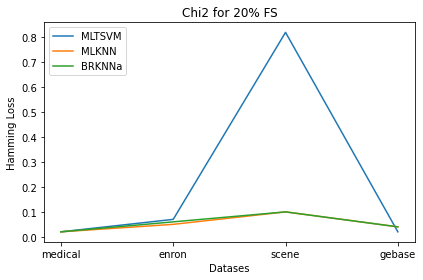

In [ ]:
import matplotlib.pyplot as plt
dataset=['medical','enron','scene','gebase']
print(hamming_loss_MLKNN)
fig, ax=plt.subplots()
ax.plot(dataset,hamming_loss_MLTSVM, label='MLTSVM')
ax.plot(dataset,hamming_loss_MLKNN, label='MLKNN')
ax.plot(dataset,hamming_loss_BRKNNa, label='BRKNNa')
ax.legend(loc='upper left')
ax.set_title('Chi2 for 20% FS')
ax.set_xlabel('Datases')
ax.set_ylabel('Hamming Loss')
plt.tight_layout()
plt.savefig('chi-20-hamming loss')

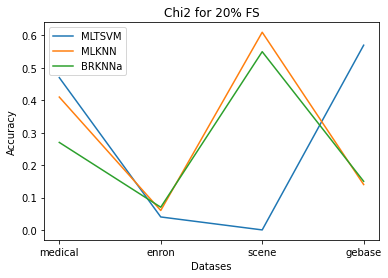

In [ ]:
#import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax.plot(dataset,accuracy_MLTSVM, label='MLTSVM')
ax.plot(dataset,accuracy_MLKNN, label='MLKNN')
ax.plot(dataset,accuracy_BRKNNa, label='BRKNNa')
ax.legend(loc='upper left')
ax.set_title('Chi2 for 20% FS')
ax.set_xlabel('Datases')
ax.set_ylabel('Accuracy')
plt.savefig('chi-20-Accuracy')

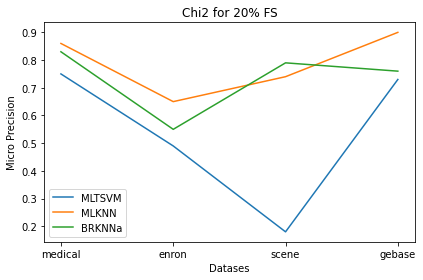

In [ ]:
fig, ax=plt.subplots()
ax.plot(dataset,precision_MLTSVM, label='MLTSVM')
ax.plot(dataset,precision_MLKNN, label='MLKNN')
ax.plot(dataset,precision_BRKNNa, label='BRKNNa')
ax.legend(loc='lower left')
ax.set_title('Chi2 for 20% FS')
ax.set_xlabel('Datases')
ax.set_ylabel('Micro Precision')
plt.tight_layout()
plt.savefig('chi-20-Precision')

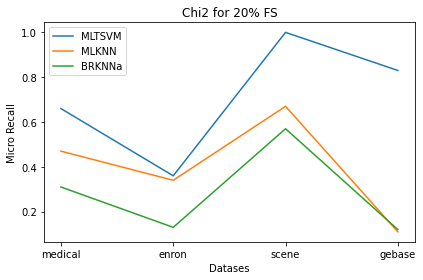

In [ ]:
fig, ax=plt.subplots()
ax.plot(dataset,recall_MLTSVM, label='MLTSVM')
ax.plot(dataset,recall_MLKNN, label='MLKNN')
ax.plot(dataset,recall_BRKNNa, label='BRKNNa')
ax.legend(loc='upper left')
ax.set_title('Chi2 for 20% FS')
ax.set_xlabel('Datases')
ax.set_ylabel('Micro Recall')
plt.tight_layout()
plt.savefig('chi-20-Recall')

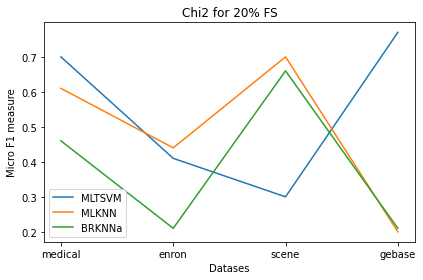

In [ ]:
#F1 measure
fig, ax=plt.subplots()
ax.plot(dataset,f1_measure_MLTSVM, label='MLTSVM')
ax.plot(dataset,f1_measure_MLKNN, label='MLKNN')
ax.plot(dataset,f1_measure_BRKNNa, label='BRKNNa')
ax.legend(loc='lower left')
ax.set_title('Chi2 for 20% FS')
ax.set_xlabel('Datases')
ax.set_ylabel('Micro F1 measure')
plt.tight_layout()
plt.savefig('chi-20-f1 measure')